## Установка Tensorflow 

``` pip install tensorflow==2.0.0-beta1  ```

In [3]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

In [56]:
a = tf.constant([1,2,3], dtype=tf.float32)
b = tf.zeros([3])+5
c = a + b
c.numpy()

array([6., 7., 8.], dtype=float32)

In [58]:
def np_sum_squares(N):
    return np.sum(np.arange(N)**2)

In [64]:
%%timeit
np_sum_squares(10**8)

1.28 s ± 70.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [66]:
%%timeit
tf_sum_squares(10**8)

807 ms ± 34.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
@tf.function
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [69]:
%%timeit
tf_sum_squares(10**8)

286 µs ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
tf.keras.__version__

'2.2.4-tf'

In [72]:
celsius    = np.array([-40, -10,  0,  8, 15, 22,  38],  
                      dtype='float32')

fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],
                       dtype='float32')

In [75]:
# параметры модели 
a = tf.Variable(tf.random.normal([1]), name='bias')
b = tf.Variable(tf.random.normal([1]), name='k')

print(a.numpy())
print(b.numpy())

[-1.1439809]
[1.496614]


In [77]:
# Наша модель
def linear_regression(x):
    return a + b*x

linear_regression(celsius)

<tf.Tensor: id=81352, shape=(7,), dtype=float32, numpy=
array([-61.00854  , -16.11012  ,  -1.1439809,  10.828931 ,  21.30523  ,
        31.781527 ,  55.72735  ], dtype=float32)>

In [79]:
# Ошибка для модели
def mean_square(y_pred, y_true):
    return tf.reduce_mean((y_pred-y_true)**2)

y_pred = linear_regression(celsius)
mean_square(y_pred, fahrenheit)

<tf.Tensor: id=81369, shape=(), dtype=float32, numpy=1240.285>

In [90]:
# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# процесс оптимизации
def model_train(X, Y):

    # Указываем нашему дифириенцированию 
    # за какими переменными следить 
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Вычисляем градиенты
    gradients = g.gradient(loss, [a, b])
    # print(gradients)
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [a, b]))
    pass

In [91]:
model_train(celsius, fahrenheit)

In [92]:
# Обучение
epochs = 2000 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    # Каждую сотую итерацию следим за тем, что произошло
    if i%100 == 0:
        y_pred = linear_regression(celsius)
        loss_val = mean_square(y_pred, fahrenheit)
        print("step: %i, loss: %f, a: %f, b: %f" % (i, loss_val, a.numpy(), b.numpy()))


step: 0, loss: 1027.646240, a: -0.759606, b: 2.074015
step: 100, loss: 699.663757, a: 4.961123, b: 2.025738
step: 200, loss: 476.366180, a: 9.681405, b: 1.985902
step: 300, loss: 324.340576, a: 13.576196, b: 1.953032
step: 400, loss: 220.838242, a: 16.789862, b: 1.925911
step: 500, loss: 150.371597, a: 19.441521, b: 1.903533
step: 600, loss: 102.396172, a: 21.629465, b: 1.885069
step: 700, loss: 69.733795, a: 23.434763, b: 1.869833
step: 800, loss: 47.496433, a: 24.924353, b: 1.857262
step: 900, loss: 32.356762, a: 26.153442, b: 1.846889
step: 1000, loss: 22.049257, a: 27.167597, b: 1.838331
step: 1100, loss: 15.031702, a: 28.004393, b: 1.831268
step: 1200, loss: 10.254022, a: 28.694847, b: 1.825442
step: 1300, loss: 7.001275, a: 29.264553, b: 1.820634
step: 1400, loss: 4.786748, a: 29.734627, b: 1.816667
step: 1500, loss: 3.279042, a: 30.122496, b: 1.813393
step: 1600, loss: 2.252561, a: 30.442533, b: 1.810692
step: 1700, loss: 1.553717, a: 30.706602, b: 1.808464
step: 1800, loss: 1.0

## Собираем свой w2v! 

In [5]:
import gensim
gensim.__version__

'3.7.1'

In [6]:
w2v = gensim.models.KeyedVectors.load_word2vec_format("184/model.bin",
                                                      binary=True)

In [9]:
w2v.most_similar('митинг_NOUN')

[('митинг_PROPN', 0.5869618654251099),
 ('пикет_NOUN', 0.5843158960342407),
 ('шествие_NOUN', 0.5592673420906067),
 ('верхнепышминц_PROPN', 0.5254683494567871),
 ('брелин_PROPN', 0.5171799659729004),
 ('97-летие_NOUN', 0.5084720849990845),
 ('митинод_NOUN', 0.505733072757721),
 ('демонстрация_NOUN', 0.5037501454353333),
 ('протест_NOUN', 0.5021286606788635),
 ('санкционировать_ADJ', 0.49920910596847534)]

In [17]:
vocabulary = w2v.vocab
len(vocabulary)

249318

In [18]:
len(set([item.split('_')[0] for item in vocabulary.keys()]))

215875

In [21]:
w2v.get_vector('любовь_NOUN').shape

(300,)

In [30]:
# уникальные слова без тэгов
words = list(set([item.split('_')[0] for item in vocabulary.keys()]))

In [32]:
len(words)

215875

In [33]:
import numpy as np 
from tqdm import tqdm_notebook

X = np.zeros([len(words) + 2, 300])

uniq_words = ["#PAD#", "#UNK#"]

i = 2
for word in tqdm_notebook(vocabulary.keys()):
    cur_word = word.split('_')[0]
    if cur_word in uniq_words:
        continue 
       
    uniq_words.append(cur_word)
    X[i] = w2v.get_vector(word)
    i += 1
    if i % 10000 == 0:
        print(i)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000


In [34]:
X.shape

(215877, 300)

In [36]:
np.save('emb.npy', X)

In [39]:
len(uniq_words) == X.shape[0]

True

In [40]:
dct = {uniq_words[i] : i for i in range(len(uniq_words))}

In [44]:
import pickle

with open('dct.pickle', 'wb') as f:
    pickle.dump(dct, f)

In [47]:
!ls -lh

total 2854440
drwx------@ 6 fulyankin  staff   204B 14 сен 13:42 184
-rw-r--r--  1 fulyankin  staff   7,6K 14 сен 15:51 Untitled.ipynb
-rw-r--r--  1 fulyankin  staff   7,0M 14 сен 15:52 dct.pickle
-rw-r--r--  1 fulyankin  staff   494M 14 сен 15:49 emb.npy
-rw-r--r--@ 1 fulyankin  staff    42K 14 сен 15:11 my_base_file.ipynb
-rw-r--r--@ 1 fulyankin  staff   893M 14 сен 13:47 ria_news_2018.pickle


## Данные

In [94]:
import pickle

# Подгружаем все данные, что у нас есть 
with open('ria_news_2018.pickle', 'rb') as f:
    ria_news = pickle.load(f)

In [101]:
ria_news[0]

{'category': 'В мире',
 'date': '2018-12-31',
 'day': '31',
 'href': '/20181231/1548961410.html',
 'image': 'https://cdn25.img.ria.ru/images/153303/06/1533030626_0:247:3501:2216_1036x0_80_0_0_291c92f1d31f7b2a613588e6a96164cb.jpg',
 'keywords': 'биньямин нетаньяху, израиль, в мире',
 'month': '12',
 'shows': '728',
 'snippet': 'Премьер-министр Израиля Биньямин Нетаньяху не намерен уходить в отставку в случае предъявления ему обвинений в коррупции, сообщает израильский телеканал i24... РИА Новости, 31.12.2018',
 'tags': 'Биньямин Нетаньяху, Израиль, В мире',
 'text': 'МОСКВА, 31 дек - РИА Новости. Премьер-министр Израиля Биньямин Нетаньяху не намерен уходить в отставку в случае предъявления ему обвинений в коррупции, сообщает израильский телеканал i24 News. В начале декабря полиция рекомендовала генпрокуратуре предъявить обвинения в коррупции Нетаньяху и его супруге Саре по итогам расследования дела об их отношениях с руководством крупнейшей в стране телекоммуникационной компании "Безек"

In [103]:
set([item['category'] for item in ria_news])

{'',
 'Акценты - Радио Sputnik',
 'АртВывих',
 'В мире',
 'Видеоблоги - Радио Sputnik',
 'Инфографика',
 'Культура',
 'Навигатор абитуриента',
 'Наука',
 'Недвижимость',
 'Общество',
 'Политика',
 'Программы - Радио Sputnik',
 'Происшествия',
 'Радио',
 'Религия',
 'Сказано в эфире - Радио Sputnik',
 'Социальный навигатор',
 'Спецпроекты - Радио Sputnik',
 'Спорт',
 'Теория заблуждений',
 'Туризм',
 'Экономика'}

In [104]:
len([item for item in ria_news if item['category'] == ''])

32896

In [105]:
len([item for item in ria_news if item['category'] != ''])

168901

In [106]:
ria_news = [item for item in ria_news if item['category'] != '']

In [108]:
title = [item['title'] for item in ria_news]
category = [item['category'] for item in ria_news]

In [109]:
dct['война']

462

In [112]:
X[462][:5]

array([ 0.56003535,  0.11304086, -0.16566475, -0.10764477, -0.37499669])

In [119]:
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def prepare_text(text, limit):
    text = re.sub('[^а-яa-zё]', ' ', text.lower())
    clear_text = tokenizer.tokenize(text)
    
    clear_text = [dct.get(item, 1) for item in clear_text] 
    
    if len(clear_text) < limit:
        clear_text += [0]*(limit - len(clear_text))
    return clear_text[:limit]

In [120]:
prepare_text(title[0], 15)

[5229, 8815, 1, 1, 100828, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

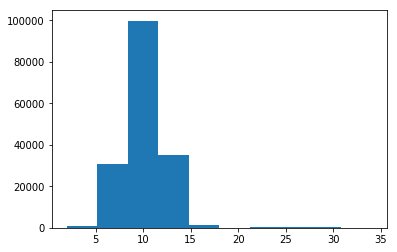

In [123]:
import matplotlib.pyplot as plt
plt.hist([len(text.split(' ')) for text in title]);

In [124]:
%%time
TITLE_LEN = 10

X_title = [prepare_text(text, TITLE_LEN) for text in title]

CPU times: user 2.92 s, sys: 47.2 ms, total: 2.97 s
Wall time: 2.97 s


In [130]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
category_labled = lbl.fit_transform(category)
category_labled 

array([2, 2, 2, ..., 8, 2, 2])

In [131]:
# Сделали OHE для таргета! 
tf.keras.utils.to_categorical(category_labled [:5])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [132]:
y = tf.keras.utils.to_categorical(category_labled)

In [137]:
from sklearn.model_selection import train_test_split

Xt_train, Xt_test, y_train, y_test = train_test_split(X_title,y,
                                                      test_size=0.2)

## Архитектура! 

In [143]:
X.shape  # эмбединги

word_embeddings = tf.Variable(X, name="word_embeddings",
                               trainable=False)

word_embeddings[0][:10]

<tf.Tensor: id=210227, shape=(10,), dtype=float64, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>

In [181]:
y.shape

(168901, 22)

In [188]:
import tensorflow.keras.layers as L

fc_layer_11 = L.Dense(32, activation = tf.nn.relu)
fc_layer_12 = L.Dense(32, activation = tf.nn.relu)
fc_layer_2 = L.Dense(y.shape[1], activation = tf.nn.softmax)

def best_in_the_world_net(y, X):
    # подставляет эмбединги вместо слов, [число текстов x 10 x 300]
    title_emb = tf.nn.embedding_lookup(word_embeddings, X)
    
    # усреднение [число текстов x 300]
    emb1 = tf.reduce_mean(title_emb, axis=1)
    
    # возмём покоординатно максимум
    emb2 = tf.reduce_max(title_emb, axis=1)
    
    # h = emb * W 
    emb1 = fc_layer_11(emb1)
    emb2 = fc_layer_12(emb2)
    
    # запишем среднее и максимум друг за другом
    emb = tf.concat([emb1, emb2], axis=1)
    
    # готовим 22 класса и применяем softmax 
    emb = fc_layer_2(emb)
    return emb

In [189]:
best_in_the_world_net(y_train[:2], Xt_train[:2])

<tf.Tensor: id=210659, shape=(2, 22), dtype=float64, numpy=
array([[0.05863108, 0.02662387, 0.0783545 , 0.03396285, 0.02949152,
        0.04470915, 0.04402488, 0.04392253, 0.02165879, 0.013673  ,
        0.0264413 , 0.0541948 , 0.04166177, 0.03284282, 0.0884323 ,
        0.05908745, 0.10169268, 0.03822117, 0.02967922, 0.05121294,
        0.02231324, 0.05916813],
       [0.04028916, 0.01196469, 0.07501324, 0.03217173, 0.02565023,
        0.041402  , 0.03703912, 0.04296329, 0.01998138, 0.00881743,
        0.02565694, 0.04795571, 0.03679612, 0.02020398, 0.08685935,
        0.06149658, 0.10129445, 0.0735731 , 0.06053682, 0.04587431,
        0.03741428, 0.0670461 ]])>

In [212]:
p_pred = best_in_the_world_net(y_train[:2], Xt_train[:2])
p_pred

<tf.Tensor: id=210830, shape=(2, 22), dtype=float64, numpy=
array([[0.05863108, 0.02662387, 0.0783545 , 0.03396285, 0.02949152,
        0.04470915, 0.04402488, 0.04392253, 0.02165879, 0.013673  ,
        0.0264413 , 0.0541948 , 0.04166177, 0.03284282, 0.0884323 ,
        0.05908745, 0.10169268, 0.03822117, 0.02967922, 0.05121294,
        0.02231324, 0.05916813],
       [0.04028916, 0.01196469, 0.07501324, 0.03217173, 0.02565023,
        0.041402  , 0.03703912, 0.04296329, 0.01998138, 0.00881743,
        0.02565694, 0.04795571, 0.03679612, 0.02020398, 0.08685935,
        0.06149658, 0.10129445, 0.0735731 , 0.06053682, 0.04587431,
        0.03741428, 0.0670461 ]])>

In [213]:
y_true = y_train[:2]

In [216]:
# Ошибка для модели
def logloss(p_pred, y_true):
    return tf.reduce_mean(-1*tf.reduce_sum(y_true*tf.math.log(p_pred),
                                           axis=1),axis=0)
logloss(p_pred, y_train[:2])

<tf.Tensor: id=210850, shape=(), dtype=float64, numpy=2.8577092665010047>

In [217]:
# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

In [218]:
# процесс оптимизации
def model_train(X, Y):

    # Указываем нашему дифириенцированию 
    # за какими переменными следить 
    with tf.GradientTape() as g:
        pred = best_in_the_world_net(X)
        loss = logloss(pred, Y)

    # Вычисляем градиенты
    gradients = g.gradient(loss, [a, b])
    # print(gradients)
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [a, b]))
    pass

In [ ]:
model_train(X, Y)

In [220]:
# ОУ ЩИТ! 
p_pred.trainable_variables

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'trainable_variables'

# ЗАНОВО! 

In [223]:
from tensorflow.keras import Model

class NeuralNet_2(Model):
    # инициализация всех слоёв 
    def __init__(self):
        super(NeuralNet_2, self).__init__()
        self.fc_layer_11 = L.Dense(32, activation = tf.nn.relu)
        self.fc_layer_12 = L.Dense(32, activation = tf.nn.relu)
        self.fc_layer_2 = L.Dense(y.shape[1], activation = tf.nn.softmax)

    # примение 
    def call(self, X, is_training=False):
        
        # подставляет эмбединги вместо слов, [число текстов x 10 x 300]
        title_emb = tf.nn.embedding_lookup(word_embeddings, X)
        
        # усреднение [число текстов x 300]
        emb1 = tf.reduce_mean(title_emb, axis=1)

        # возмём покоординатно максимум
        emb2 = tf.reduce_max(title_emb, axis=1)

        # h = emb * W 
        emb1 = self.fc_layer_11(emb1)
        emb2 = self.fc_layer_12(emb2)

        # запишем среднее и максимум друг за другом
        emb = tf.concat([emb1, emb2], axis=1)

        # готовим 22 класса и применяем softmax 
        emb = self.fc_layer_2(emb)
        return emb

In [224]:
# Build neural network model.
neural_net = NeuralNet_2()

In [225]:
neural_net.call(Xt_train[:2])

<tf.Tensor: id=210940, shape=(2, 22), dtype=float64, numpy=
array([[0.05193065, 0.02557935, 0.02268721, 0.01020724, 0.01398864,
        0.02316426, 0.04217159, 0.03379473, 0.0728834 , 0.02768781,
        0.04918218, 0.14353078, 0.03812063, 0.1092432 , 0.06715428,
        0.02480914, 0.04679897, 0.03351585, 0.02070424, 0.05155719,
        0.01420924, 0.07707941],
       [0.06135809, 0.0149961 , 0.02018393, 0.00472698, 0.00773998,
        0.01767431, 0.0397786 , 0.03600329, 0.07843847, 0.01979223,
        0.0633953 , 0.13743459, 0.03541753, 0.10526493, 0.04728267,
        0.01558435, 0.05250735, 0.03254406, 0.02728033, 0.03380963,
        0.01234865, 0.13643865]])>

In [234]:
# процесс оптимизации
def model_train(X, Y):

    # Указываем нашему дифириенцированию 
    # за какими переменными следить 
    with tf.GradientTape() as g:
        pred = neural_net(X)
        loss = logloss(pred, Y)
    
    # вытаскиваем переменные для взятия производных
    trainable_variables = neural_net.trainable_variables
    
    # Вычисляем градиенты
    gradients = g.gradient(loss, trainable_variables)
#     for item in gradients:
#         print(item.shape)
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    pass

In [235]:
model_train(Xt_train[:2], y_train[:2])

In [240]:
# Обучение
epochs = 5 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train(Xt_train, y_train)
    
    # Каждую сотую итерацию следим за тем, что произошло
    y_pred = neural_net(Xt_test)
    loss_val = logloss(y_pred, y_test)
    print("step: %i, loss: %f" % (i, loss_val))


step: 0, loss: 3.274314
step: 1, loss: 3.269409
step: 2, loss: 3.264539
step: 3, loss: 3.259706
step: 4, loss: 3.254908


### Пример со свёрткой

In [268]:
conv = L.Conv1D(1, 4)# , padding='same')

In [269]:
emb = tf.nn.embedding_lookup(word_embeddings, Xt_train[:2])
emb.shape

TensorShape([2, 10, 300])

In [270]:
conv(emb).shape

TensorShape([2, 7, 1])